In [ ]:
import pandas as pd 
import pandas as pd

df_gpt = pd.read_csv('../data/responses/gpt4o/gpt4o_responses_annotated.csv')
df_r1 = pd.read_csv('../data/responses/r1/r1_response_annotated.csv')
df_phi = pd.read_csv('../data/responses/phi4/phi4_response_annotated.csv')
df_gemma = pd.read_csv('../data/responses/gemma3/gemma3-27b_response_annotated.csv')

df_r1 = df_r1.dropna()
df_r1 = df_r1.head(50)
df_gpt = df_gpt.head(50)
df_phi = df_phi.head(50)
df_gemma = df_gemma.head(50)

In [2]:
gpt_errors = df_gpt['Error Reason'].value_counts()
r1_errors = df_r1['Error Reason'].value_counts()
phi4_errors = df_phi['Error Reason'].value_counts()
gemma3_errors = df_gemma['Error Reason'].value_counts()

In [8]:
results_all = {
    'Error 1.1': [gpt_errors.get('(1.3.1.1 Irrelevant/incorrect variable cited or used)', 0), 
                  r1_errors.get('(1.3.1.1 Irrelevant/incorrect variable cited or used)', 0), 
                  phi4_errors.get('(1.3.1.1 Irrelevant/incorrect variable cited or used)', 0), 
                  gemma3_errors.get('(1.3.1.1 Irrelevant/incorrect variable cited or used)', 0)],
    'Error 1.2': [gpt_errors.get('(1.3.2 Incorrect value of variable cited or used)', 0), 
                  r1_errors.get('(1.3.2 Incorrect value of variable cited or used)', 0), 
                  phi4_errors.get('(1.3.2 Incorrect value of variable cited or used)', 0),
                  gemma3_errors.get('(1.3.2 Incorrect value of variable cited or used)', 0)],
    'Error 1.3': [gpt_errors.get('(1.3.1.2 Relevant variable missing)', 0),
                  r1_errors.get('(1.3.1.2 Relevant variable missing)', 0), 
                  phi4_errors.get('(1.3.1.2 Relevant variable missing)', 0), 
                  gemma3_errors.get('(1.3.1.2 Relevant variable missing)', 0)],
    'Error 2': [gpt_errors.get('(1.1.2 Value of a known variable calculated again)', 0), 
                r1_errors.get('(1.1.2 Value of a known variable calculated again)', 0), 
                phi4_errors.get('(1.1.2 Value of a known variable calculated again)', 0),
                gemma3_errors.get('(1.1.2 Value of a known variable calculated again)', 0)],
    'Error 3.1': [gpt_errors.get('2.1 Unit Inconsistency)', 0), 
                  r1_errors.get('2.1 Unit Inconsistency)', 0), 
                  phi4_errors.get('2.1 Unit Inconsistency)', 0),
                  gemma3_errors.get('2.1 Unit Inconsistency)', 0)],
    'Error 3.2': [gpt_errors.get('2.3 Calculation Error)', 0), 
                  r1_errors.get('2.3 Calculation Error)', 0),
                  phi4_errors.get('2.3 Calculation Error)', 0),
                  gemma3_errors.get('2.3 Calculation Error)', 0)],
    'Error 4': [gpt_errors.get('(3.3.2 Incorrect value)', 0), 
                r1_errors.get('(3.3.2 Incorrect value)', 0),
                phi4_errors.get('(3.3.2 Incorrect value)', 0),
                gemma3_errors.get('(3.3.2 Incorrect value)', 0)]
}

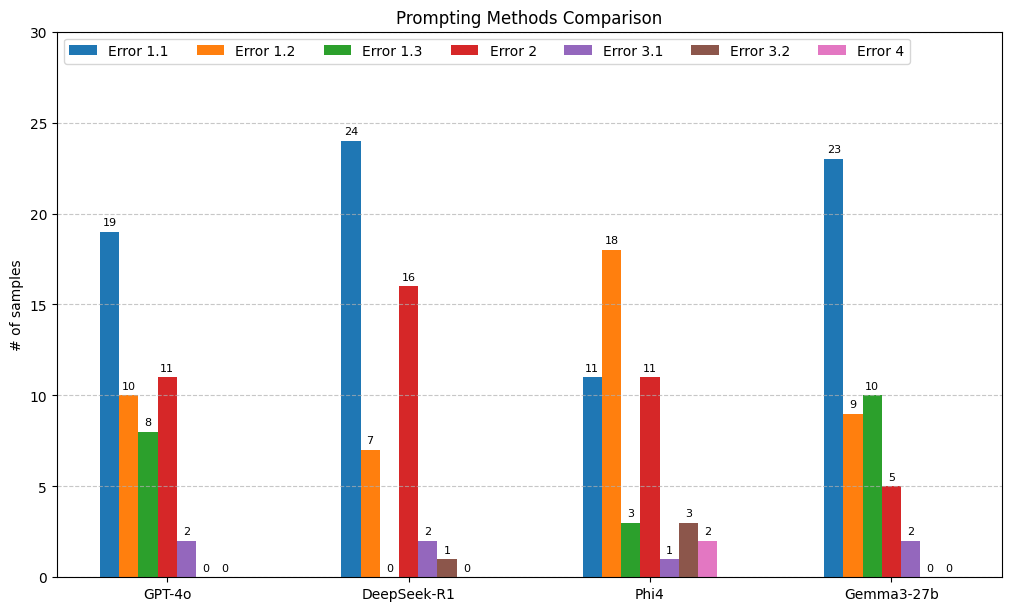

In [ ]:
models = ("GPT-4o", "DeepSeek-R1", "Phi4", "Gemma3-27b")

import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
bar_width = 0.18        
group_gap = 1.0         
num_attributes = len(results_all)

x_base = np.arange(len(models)) * (num_attributes * bar_width + group_gap)

fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')

multiplier = 0 
for attribute, measurement in results_all.items():
    offset = bar_width * multiplier
    rects = ax.bar(x_base + offset, measurement, bar_width, label=attribute)
    ax.bar_label(rects, padding=3, fontsize=8) 
    multiplier += 1 

tick_positions = x_base + (bar_width * num_attributes) / 2 - bar_width / 2

ax.set_ylabel('# of samples')
ax.set_title('Prompting Methods Comparison')
ax.set_xticks(tick_positions, models) 
ax.legend(loc='upper left', ncols=num_attributes)
ax.set_ylim(0, 30) 

ax.yaxis.grid(True, linestyle='--', alpha=0.7)

output_filename = 'error_distribution.png'
plt.savefig(output_filename, dpi=300, bbox_inches='tight')
plt.show()